In [1]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [2]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [3]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [4]:
specification = specs.CoiledCoil.from_parameters

In [5]:
sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']

In [6]:
parameters = [
    Parameter.static('Oligomeric State', 2),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 5.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [7]:
default_values = [x.default_value for x in parameters]
print(default_values)

[2, 32, 5.0, 200, 154.2]


In [8]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [9]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

In [10]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min    	max     
0  	59   	-915.239	44.6466	-1048.1	-841.162
1  	64   	-961.645	40.0979	-1063.07	-908.973
2  	62   	-991.329	36.3919	-1071.39	-944.767
3  	74   	-1033.23	23.8253	-1080.03	-982.953
4  	58   	-1051.02	14.7521	-1084.04	-1030.02
5  	65   	-1064.1 	12.3418	-1084.04	-1041.44
6  	76   	-1075.98	5.02771	-1088.86	-1066.95
7  	74   	-1081.14	2.81123	-1089.03	-1075.5 
8  	74   	-1083.5 	2.11091	-1090.41	-1080.43
9  	69   	-1085.08	2.07555	-1090.41	-1082.29
10 	69   	-1086.8 	1.47445	-1090.41	-1083.82
11 	59   	-1087.85	0.887347	-1090.41	-1086.31
12 	82   	-1088.72	0.577992	-1090.41	-1087.84
13 	70   	-1089.2 	0.492187	-1090.42	-1088.35
14 	61   	-1089.48	0.454258	-1090.58	-1088.73
15 	70   	-1089.88	0.364722	-1091.01	-1089.18
16 	66   	-1090.16	0.36684 	-1091.6 	-1089.57
17 	66   	-1090.45	0.399136	-1091.6 	-1089.95
18 	58   	-1090.73	0.431724	-1091.7 	-1090.13
19 	60   	-1091.06	0.382441	-1091.81	-1090.35
20 	63   	-1091.36	0.269558	-1091.89	-1090.8 
21

In [11]:
optimized_model_ga = opt_ga.best_model

In [12]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-1092.6595379123703

In [13]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [14]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

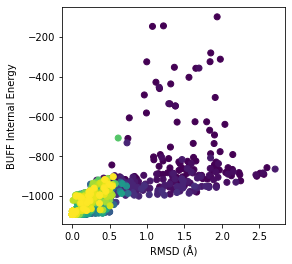

In [15]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('ga.png')

In [16]:
f = open('d_CC-Di-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [17]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [18]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-902.287	76.8098	-1021.49	-481.724
1  	100  	-930.233	39.4739	-1067.04	-842.682
2  	100  	-950.566	38.9678	-1081.84	-878.212
3  	100  	-973.829	37.885 	-1083.37	-890.06 
4  	100  	-990.139	33.9248	-1083.37	-929.44 
5  	100  	-1004.32	32.4121	-1083.37	-941.152
6  	100  	-1016.99	30.6383	-1083.37	-965.111
7  	100  	-1025.58	31.6941	-1089.19	-976.515
8  	100  	-1035.42	29.8959	-1089.19	-983.501
9  	100  	-1044.8 	28.4396	-1089.36	-991.128
10 	100  	-1054.04	26.4972	-1089.36	-995.792
11 	100  	-1061.86	22.5756	-1091.54	-995.792
12 	100  	-1071.42	16.7923	-1091.54	-1013.13
13 	100  	-1077.76	9.52207	-1091.54	-1037.03
14 	100  	-1081.46	5.83891	-1091.58	-1063.29
15 	100  	-1083.59	5.35222	-1091.58	-1063.29
16 	100  	-1085.18	4.71969	-1091.73	-1063.29
17 	100  	-1086.15	4.32072	-1091.87	-1063.29
18 	100  	-1087.64	2.71385	-1091.87	-1075.38
19 	100  	-1088.44	2.44571	-1092.04	-1075.38
20 	100  	-1089.13	1.66937	-1092.04	-1082.01
21 	100  	

In [19]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-1092.8637549080547

In [20]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [21]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

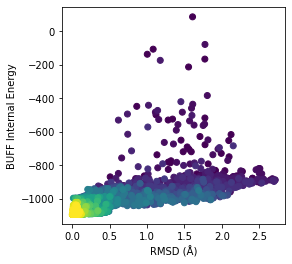

In [22]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('de.png')

In [23]:
f = open('d_CC-Di-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [24]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [25]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max   
0  	100  	-815.913	188.673	-1052.13	-243.7
1  	88   	-890.869	121.541	-1067.01	-220.53
2  	73   	-896.279	115.821	-1080.72	-220.53
3  	73   	-866.656	141.374	-1053.78	-220.53
4  	92   	-566.601	255.262	-934.092	48.4961
5  	91   	-753.814	265.453	-1022.03	201.352
6  	84   	-834.608	200.525	-1085.89	201.352
7  	54   	-847.865	168.507	-1010.05	201.352
8  	71   	-811.314	150.153	-1012.72	-251.257
9  	91   	-743.954	226.06 	-1015.69	152.806 
10 	90   	-759.559	233.336	-1045.12	164.217 
11 	51   	-792.944	222.754	-1064.77	164.217 
12 	73   	-716.981	202.768	-1007.89	-4.90658
13 	93   	-796.143	180.782	-1018.47	-213.182
14 	90   	-850.577	197.298	-1051.26	-26.8666
15 	66   	-875.707	113.186	-1061.83	-401.327
16 	51   	-869.144	125.729	-1039.39	-401.327
17 	73   	-811.996	194.137	-1039.33	-212.118
18 	73   	-870.224	145.939	-1070.48	-212.118
19 	81   	-894.297	128.428	-1070.48	-138.659
20 	86   	-800.07 	195.662	-992.449	41.4073 
21 	74   	-836.632	17

In [26]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-1085.893020635569

In [27]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [28]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

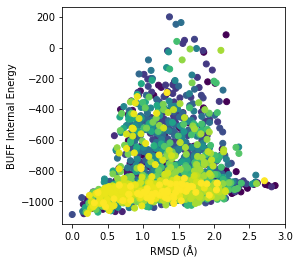

In [29]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('pso.png')

In [30]:
f = open('d_CC-Di-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [31]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [32]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	100  	-774.993	181.477	-968.818	-293.838
1  	100  	-887.89 	121.022	-1024.71	-364.232
2  	100  	-915.293	104.455	-1066   	-448.479
3  	100  	-971.381	46.7794	-1058.89	-790.375
4  	100  	-1005.44	28.7986	-1088.77	-932.285
5  	100  	-1020.46	27.5721	-1089.15	-973.127
6  	100  	-1031.02	31.0837	-1090.37	-943.78 
7  	100  	-1042.93	30.4699	-1090.68	-991.206
8  	100  	-1055.49	32.0515	-1092.06	-988.908
9  	100  	-1078.44	15.5238	-1091.68	-993.827
10 	100  	-1062.17	34.8182	-1092.23	-995.167
11 	100  	-1083.22	15.5742	-1092.12	-997.515
12 	100  	-1074.86	26.8586	-1092.41	-995.403
13 	100  	-1087.18	10.1568	-1092.66	-1020.74
14 	100  	-1081.07	18.9499	-1092.55	-995.632
15 	100  	-1087.85	9.55472	-1092.56	-1048.08
16 	100  	-1085.59	10.3765	-1092.8 	-1048.33
17 	100  	-1083.17	10.3393	-1092.89	-1048.06
18 	100  	-1088.39	7.20887	-1092.83	-1064.29
19 	100  	-1083.73	10.7264	-1092.84	-1048.28
20 	100  	-1082.78	11.8936	-1092.88	-1048.08
21 	100  	

In [33]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-1092.9119089451087

In [34]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [35]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

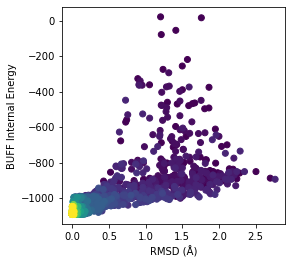

In [36]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUFF Internal Energy')

fig.savefig('cmaes.png')

In [37]:
f = open('d_CC-Di-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)